In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')


datadir = '../data/main-results'

df = None
files = list()
for f in os.listdir(datadir):
    if f.startswith('result'):
        path = os.path.join(datadir, f)
        if df is None:
            df = pd.read_csv(path)
        else:
            df = df.append(pd.read_csv(path), ignore_index=True)

df.sort_values(['method', 'distribution_size', 'sample_size'], inplace=True)
df.index = pd.MultiIndex.from_arrays([df.method, df.distribution_size, df.sample_size])
df.drop(['method', 'distribution_size', 'sample_size'], axis=1, inplace=True)

In [2]:
df.time.loc[:,:,(1<<30)-1]/60

method           distribution_size
alias            1024                  0.521662
                 2048                  0.539718
                 4096                  0.524480
                 8192                  0.535278
                 16384                 0.547658
                 32768                 0.533911
                 65536                 0.558107
                 131072                0.585860
                 262144                0.594912
                 524288                0.637630
                 1048576               0.761299
                 2097152               0.952358
                 4194304               0.984069
                 8388608               1.015897
                 16777216              1.019938
                 33554432              1.020651
                 67108864              1.021557
binsearch-fixed  1024                  1.064577
                 2048                  1.159129
                 4096                  1.255415
     

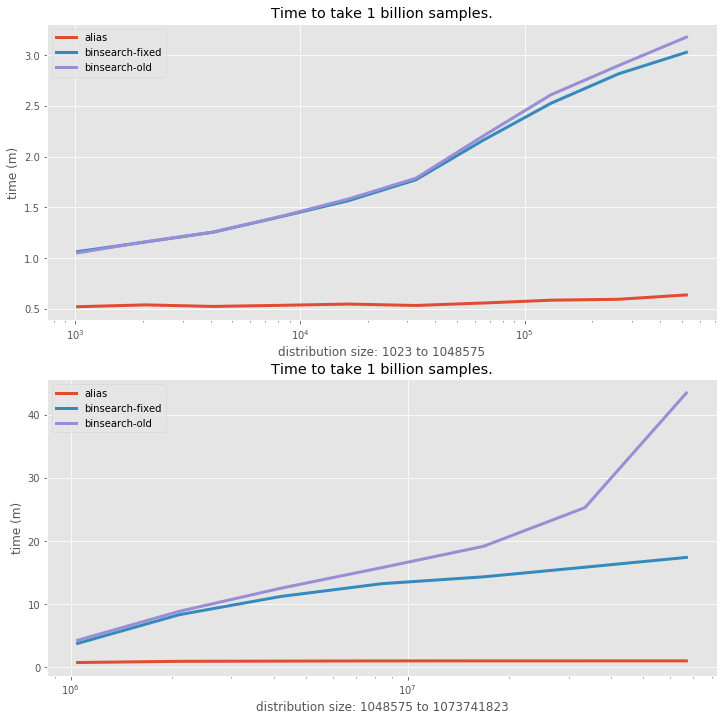

In [33]:
sample_size = (1 << 30) - 1
f = plt.figure(figsize=(12, 12))
axes = list()
axes.append(f.add_subplot(211))
axes.append(f.add_subplot(212))

ranges = [slice(1023, (1<<20) - 1), slice((1<<20)-1,(1<<30)-1)]
for i in range(2):
    ax = axes[i]
    time = df.time.loc[:,ranges[i],sample_size] / 60
    
    for method in time.index.levels[0]:
        time.loc[method].loc[:,sample_size].plot.line(ax=ax, label=method, lw=3, logx=True)
        
    ax.legend()
    ax.set_title('Time to take 1 billion samples.')
    ax.set_xlabel('distribution size: {} to {}'.format(ranges[i].start, ranges[i].stop))
    ax.set_ylabel('time (m)')
    

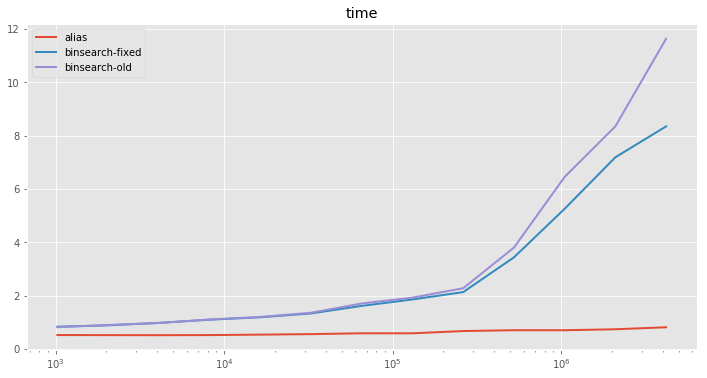

In [119]:
sample_size = (1 << 23) - 1
f = plt.figure(figsize=(12, 6))
ax = f.add_subplot(111)
time = df.time.loc[:,:,sample_size]
for method in time.index.levels[0]:
    time.loc[method].plot.line(ax=ax, label=method, lw=2, logx=True)
ax.set_xlabel('')
ax.set_title('time')
ax.legend()
pass